# Advent of Code 2025

## Imports

In [1]:
from dataclasses import dataclass
import copy
import math
import numpy as np
from collections import deque , defaultdict
from itertools import combinations

## Day 1

In [2]:
counter_1 = 0
counter_2 = 0
positions = [50]
with open ("data/input_day1") as f:
    for line in f.readlines():
        line = line.strip()
        sign = -1 if line[0] == "L" else 1
        number = sign * int(line[1:])
        positions.append((positions[-1] + number) % 100)

        # counting for each complete turn of the quadrant
        counter_2 += abs(number)//100 
        # counting each stop at 0
        if positions[-1] == 0: 
            counter_1 += 1
        # don't count if we move from 0
        elif positions[-2] != 0: 
            # counting if the last few turns that are not part of a full turn pass the 0
            counter_2 += 1 if (sign == -1 and positions[-2] < positions[-1]) or (sign == 1 and positions[-2] > positions[-1]) else 0 

print(f"Answer day 1 part 1: {counter_1}")
print(f"Answer day 1 part 2: {counter_2 + counter_1}")

Answer day 1 part 1: 1092
Answer day 1 part 2: 6616


## Day 2

In [3]:
def check_ID(id: str) -> int:
    # Invalid IDs rules: 
    # - sequence of digits repeated twice: 55 (5 twice), 6464 (64 twice), and 123123 (123 twice)
    # - None of the numbers have leading zeroes
    if id[0] == '0': return 1
    if len(id)%2 == 0 and 2*id[:len(id)//2] == id: return 1

    # New invalid IDs rules: 
    # - Some sequence of digits repeated at least twice: 12341234 (1234 two times), 123123123 (123 three times), 1212121212 (12 five times), and 1111111 (1 seven times)
    # make a growing window that stops just after half the number's length
    for idx, size in enumerate(range(1, len(id)//2+1), start=1):
        repeat, remain = divmod(len(id), idx)
        if remain == 0 and repeat * id[:size] == id: return 2
            
    return 0

counter_1 = 0
counter_2 = 0

with open ("data/input_day2") as f:
    ids_range = f.read().split(",")
    for ir in ids_range:
        start, stop = ir.split('-')
        ids_list = range(int(start), int(stop)+1)

        for id in ids_list:
            match check_ID(str(id)):
                case 1:
                    counter_1 += id
                case 2:
                    counter_2 += id

print(f"Answer day 2 part 1: {counter_1}")
print(f"Answer day 2 part 2: {counter_1 + counter_2}")

Answer day 2 part 1: 18700015741
Answer day 2 part 2: 20077272987


## Day 3

In [4]:
def find_max_joltage(bank: list[int], response_size:int) -> int:
    mark = 0
    deadspace = len(bank) - response_size + 1
    response = []
    bank_sorted = sorted(list(enumerate(bank)), key= lambda x: x[1], reverse=True)

    for _ in range(response_size):

        for position, cell in bank_sorted:
            if position >= mark  and position < deadspace:
                response.append(cell)
                bank_sorted.remove((position, cell))
                deadspace += 1
                mark = position
                break

    return sum([n * 10 ** (response_size - idx - 1) for idx, n in enumerate(response)])


with open("data/input_day3") as f:
    joltage_1 = 0
    joltage_2 = 0
    for line in f.readlines():
        line = [int(item) for item in line.strip()]
        joltage_1 += find_max_joltage(line, 2)
        joltage_2 += find_max_joltage(line, 12)

    print(f"Answer day 3 part 1: {joltage_1}")
    print(f"Answer day 3 part 2: {joltage_2}")

Answer day 3 part 1: 17229
Answer day 3 part 2: 170520923035051


## Day 4

### Initial attempt

In [5]:
# rolls_map = dict()
# rolls_position = []
# with open("data/input_day4") as f:
#     row = col = 0
#     for row, line in enumerate(f.readlines()):
#         for col, char in enumerate(line):
#             rolls_presence = 1 if char =="@" else 0
#             position = (row, col)
#             rolls_map[position] = rolls_presence
#             if rolls_presence: rolls_position.append(position)
    
#     map_size = (row, col)

# adj_move = [(1, 0), (1, 1), (-1, 0), (0, 1), (0, -1), (-1, -1), (1, -1), (-1, 1)]

# count_1 = 0
# for position in rolls_position:
#     # fewer than four rolls of paper in the eight adjacent positions
#     adjacent_positions = [(position[0] + move_row, position[1] + move_col) for move_row, move_col in adj_move if  0 <= position[0] + move_row <= map_size[0] and 0 <= position[1] + move_col <= map_size[1]]
#     rolls_adjacent_number = sum(rolls_map[pos] for pos in adjacent_positions)
#     if rolls_adjacent_number < 4 : count_1 += 1

# print(count_1)

### First succesful attempt

In [6]:
# # Use a Cell datacalss to keep the information 
# @dataclass
# class Cell:
#     adjacent_positions: list[tuple[int, int]]
#     loaded: int

# rolls_map: dict[tuple[int, int], Cell] = dict()
# rolls_position: list[tuple[int, int]] = []
# count_1 = 0

# # Fill in the cell
# with open("data/input_day4") as f:
#     row = col = 0
#     for row, line in enumerate(f.readlines()):
#         for col, char in enumerate(line):
#             rolls_presence = 1 if char =="@" else 0
#             position = (row, col)

#             rolls_map[position] = Cell(
#                 adjacent_positions = [],
#                 loaded = rolls_presence
#             )

#             if rolls_presence: rolls_position.append(position)
    
#     map_size = (row, col)

# def forklift_run(rolls_map: dict[tuple[int, int], Cell], rolls_position: list[tuple[int, int]]) -> tuple[dict[tuple[int, int], Cell], list[tuple[int, int]], int]:
#     # deepcopies of each entries to avoid changing the input as we work on it
#     new_rolls_positions = rolls_position[:]
#     new_rolls_map = copy.deepcopy(rolls_map)

#     for position in rolls_position:
#         rolls_cell = rolls_map[position]
#         rolls_adjacent_number = sum(rolls_map[pos].loaded for pos in rolls_cell.adjacent_positions)

#         if rolls_adjacent_number < 4 : 
#             new_rolls_map[position].loaded = 0
#             new_rolls_positions.remove(position)

#     return new_rolls_map, new_rolls_positions, len(rolls_position) - len(new_rolls_positions)


# # Populate the adjacent positions list
# adj_move = [(1, 0), (1, 1), (-1, 0), (0, 1), (0, -1), (-1, -1), (1, -1), (-1, 1)]
# for position in rolls_position:
#     adjacent_positions = [(position[0] + move_row, position[1] + move_col) for move_row, move_col in adj_move if  0 <= position[0] + move_row <= map_size[0] and 0 <= position[1] + move_col <= map_size[1]]
#     rolls_map[position].adjacent_positions = adjacent_positions
#     rolls_adjacent_number = sum(rolls_map[pos].loaded for pos in adjacent_positions)

#     if rolls_adjacent_number < 4 : 
#         count_1 += 1


# print(f"Answer to day 4 part 1: {count_1}")

# removed_total = 0
# removed = None
# while removed != 0:
#     rolls_map, rolls_position, removed = forklift_run(rolls_map, rolls_position)
#     removed_total += removed

# print(f"Answer to day 4 part 2: {removed_total}")

### More efficient rewrite

In [7]:
rolls_map = []
rolls_position: list[tuple[int, int]] = []

# Fill in a Numpy array
with open("data/input_day4") as f:
    
    for row, line in enumerate(f.readlines()):
        line = line.strip()
        current_row = []
        for col, char in enumerate(line):
            rolls_presence = 1 if char =="@" else 0
            position = (row, col)

            current_row.append(rolls_presence)

            if rolls_presence: 
                rolls_position.append(position)
        
        rolls_map.append(current_row)

rolls_map_array = np.array(rolls_map)

# Populate the adjacent positions map
adj_move = [(1, 0), (1, 1), (-1, 0), (0, 1), (0, -1), (-1, -1), (1, -1), (-1, 1)]
adjacent_positions_map: dict[tuple[int, int], list[tuple[int, int]]] = dict()
count_1 = 0
for position in rolls_position:
    adjacent_positions = [(position[0] + move_row, position[1] + move_col) for move_row, move_col in adj_move if  0 <= position[0] + move_row < rolls_map_array.shape[0] and 0 <= position[1] + move_col < rolls_map_array.shape[1]]
    adjacent_positions_map[position] = adjacent_positions
    rolls_adjacent_number = sum(rolls_map_array[pos] for pos in adjacent_positions)

    if rolls_adjacent_number < 4 : 
        count_1 += 1

print(f"Answer to day 4 part 1: {count_1}")

def forklift_run(array: np.ndarray, positions_list: list[tuple[int, int]], adjacent_map: dict[tuple[int, int], list[tuple[int, int]]]) -> tuple[np.ndarray, list[tuple[int, int]], int]:
    # deepcopies of each entries to avoid changing the input as we work on it
    new_positions = positions_list[:]
    new_array = array.copy()

    for position in positions_list:
        rolls_adjacent_number = sum(array[pos] for pos in adjacent_map[position])

        if rolls_adjacent_number < 4 : 
            new_array[position] = 0
            new_positions.remove(position)

    return new_array, new_positions, len(positions_list) - len(new_positions)

removed = None
removed_total = 0
while removed != 0:
    rolls_map_array, rolls_position, removed, = forklift_run (rolls_map_array, rolls_position, adjacent_positions_map)
    removed_total += removed

print(f"Answer to day 4 part 2: {removed_total}")

Answer to day 4 part 1: 1478
Answer to day 4 part 2: 9120


## Day 5

In [8]:
with open("data/input_day5") as f:
    fresh_ranges_list_raw, ingredients_list_raw = f.read().split("\n\n")

# simplify the ranges by combining the ones that overlap
fresh_ranges_list = []
for fresh_range in fresh_ranges_list_raw.splitlines():

    current_start, current_stop = [int(n) for n in fresh_range.split("-")]
    bin_trash = []

    for start, stop in fresh_ranges_list:
        # Determin if two ranges can be combined (either they only partially overlap or one is completely part of another)
        if (start <= current_start <= stop or start <= current_stop <= stop) or (current_start <= start and current_stop >= stop) or (current_start >= start and current_stop <= stop):
            # Determine the new boundaries of the combined range
            current_start = min(current_start, start)
            current_stop = max(current_stop, stop)
            # This is to avoid removing an item on a list we are iterating over
            bin_trash.append((start, stop))

    # Remove the ranges 
    for pair in bin_trash: fresh_ranges_list.remove(pair)
    # Add the new range
    fresh_ranges_list.append((current_start, current_stop))

# Calculate the size for each range and total them
count_2 = 0
for start, stop in fresh_ranges_list:
    count_2 += stop - start + 1

# Determine for each ingredients if it is within the bounds of any range
count_1 = 0
for ingredient in ingredients_list_raw.splitlines():
    ingint = int(ingredient)
    for start, stop in fresh_ranges_list:
        if start <= ingint <= stop:
            count_1 += 1
            break

print(f"Answer to day 5 part 1: {count_1}") 
print(f"Answer to day 5 part 2: {count_2}") 

Answer to day 5 part 1: 652
Answer to day 5 part 2: 341753674214273


## Day 6

In [9]:
with open("data/input_day6") as f:
    text = f.read()

# PART 1
*numbers, operations = [line.strip().split() for line in text.splitlines()]
# here, we transpose to use each column as the rows and iterate over them
numbers_array = np.array([[int(n) for n in line] for line in numbers]).T

total_1 = 0
for num, op in zip(numbers_array, operations):
    result = math.prod(num) if op == "*" else sum(num)
    total_1 += result

print(f"Answer to day 6 part 1: {total_1}") 

# PART 2
# Each line is entered with all characters in a Numpy array and and empty row is added to signal the end
text_array = np.array([list(line) for line in text.splitlines()[:-1]]).T
empty = np.array(text_array.shape[1] *[' '])
text_array = np.vstack([text_array, empty])

block = 0 
numbers_list = []
total_2 = 0
for col in range(text_array.shape[0]):
    number = ''.join(text_array[col]).strip()

    if not number: 
        total_2 += math.prod(numbers_list) if operations[block] == "*" else sum(numbers_list)
        block += 1
        numbers_list = []
        continue

    numbers_list.append(int(number))

print(f"Answer to day 6 part 2: {total_2}") 

Answer to day 6 part 1: 7644505810277
Answer to day 6 part 2: 12841228084455


## Day 7

In [10]:
with open("data/input_day7") as f:
    text = f.read()

# map the entry into a Numpy array
text_array = np.array([list(line) for line in text.splitlines()])

# Find the starting position and enter is as the first beam head. 
# # Add a second parameter as the origin of the beam. This is for part 2 and helps connect the splitters together
start_row, start_col = [int(n[0]) for n in np.where(text_array == 'S')]
beams = deque([[(start_row, start_col), (start_row, start_col)]])
activated_splitter = defaultdict(list)
beams_end = defaultdict(list)
while len(beams) > 0:
    # Get the next beam position and move it down
    position, origin = beams.popleft()
    new_position = (position[0]+1, position[1])

    # If the beam reaches the end of the map, stop it
    if new_position[0] >= text_array.shape[0]:
        beams_end[position].append(origin)
        continue

    # If the beam reaches a splitter, check if the said splitter has already been activated. If yes, pass. Otherwise, add the two new beams and the splitter to their respective list 
    elif text_array[new_position] == "^" and new_position not in activated_splitter.keys():
        # Add the position to the activated splitter set
        activated_splitter[new_position].append(origin)
        # Create the new splitted beam position and add them to the beams deque
        splitted_position_left = (new_position[0], new_position[1]-1)
        splitted_position_right = (new_position[0], new_position[1]+1)
        beams.extend([[splitted_position_left, new_position], [splitted_position_right, new_position]])

    elif text_array[new_position] == "^":
        activated_splitter[new_position].append(origin)

    elif text_array[new_position] == ".":
        beams.appendleft([new_position, origin])

print(f"Answer to day 7 part 1: {len(activated_splitter)}") 

# To calculate answer 2, we need to calculate for each splitter to how many it is connected upward and make the result cascade downwards
# Then, the end beams locations are used to sum how many paths are possible for each end by adding all the origins values and we can finally sum this up
activated_splitter_count = dict()
for splitter, connected_upwards in sorted(activated_splitter.items()):
    for idx, connected in enumerate(connected_upwards):

        if not activated_splitter_count.get(connected):
            connected_upwards[idx] = 1
        else:
            connected_upwards[idx] = activated_splitter_count.get(connected)
            
    activated_splitter_count[splitter] = sum(connected_upwards)

total_timelines = 0
for _, origins_list in beams_end.items():
    for origin in origins_list:
        total_timelines += activated_splitter_count[origin]

print(f"Answer to day 7 part 2: {total_timelines}") 

Answer to day 7 part 1: 1667
Answer to day 7 part 2: 62943905501815


## Day 8

In [11]:
def get_3D_euclidian_distance(p, q):
    return math.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2 + (p[2] - q[2]) ** 2)

In [12]:
def merged_circuits(circuits):
    idx = 0
    while idx < len(circuits):
        for circ2 in circuits[idx+1:]:
            if not circuits[idx].isdisjoint(circ2):
                last  = circuits[idx].intersection(circ2)
                circuits[idx].update(circ2)
                circuits.remove(circ2)
                idx = idx-1
                break
        
        idx += 1

    return circuits

In [13]:
def find(coordinate, tree):
    current = coordinate
    previous = None

    while current != previous:
        current, previous = tree[current], current

    # This is path compression where we directly attach the searched item to its representative to lower next times search
    tree[coordinate] = current

    return current

In [14]:
def union(coordinate_1, coordinate_2, tree, parents) -> None:
    representative_1 = find(coordinate_1, tree)
    representative_2 = find(coordinate_2, tree)

    # if representatives are the same, no need to union
    if representative_1 == representative_2:
        return
    # If boths sets are empty, something wrong happened
    if parents[representative_2] == 0 or parents[representative_1] == 0:
        raise ValueError(f"{representative_2}, {representative_1}")
    # Union by Rank -> we try to add the smallest set to the biggest to avoid complexifying the structure
    if parents[representative_1] > parents[representative_2]:
        tree[representative_2] = representative_1
        parents[representative_1] += parents[representative_2]
        parents[representative_2] = 0
    elif parents[representative_1] < parents[representative_2]:
        tree[representative_1] = representative_2
        parents[representative_2] += parents[representative_1]
        parents[representative_1] = 0
    else:
        tree[representative_2] = representative_1
        parents[representative_1] += parents[representative_2]
        parents[representative_2] = 0
    


In [15]:
def euclidian_3D_distance(array3D):
    return np.sqrt(np.pow(array3D[:, 0] - array3D[:, 3], 2) + np.pow(array3D[:, 1] - array3D[:, 4], 2) + np.pow(array3D[:, 2] - array3D[:, 5], 2))

In [16]:
with open("data/input_day8") as f:
    text = f.read()

# Create the array containing all the numbers
numbers_list = [tuple([int(num) for num in line.split(",")]) for line in text.splitlines()]
numbers_array = np.array(numbers_list)
# This creates the combinations array without passing by the combinations itertools
i, j = np.triu_indices(len(numbers_array), k=1)
numbers_combinations = np.column_stack((numbers_array[i], numbers_array[j]))
# Calculate the distances (vectorized calculation)
distances = euclidian_3D_distance(numbers_combinations)
# Concatenate the distance and sort by it before removing it from the array
pairs =  np.column_stack((numbers_combinations, distances))
pairs_sorted = pairs[pairs[:, 6].argsort()][:, :6]

# Disjoint-set data structure -> Union-Find algorithm
tree = {coordinates:coordinates for coordinates in numbers_list}
parents = {coordinates:1 for coordinates in numbers_list}
# Union the coordinates for the first 100 pairs
for coordinates in pairs_sorted[:1000]:
    coordinate_1 = tuple(coordinates[:3].tolist())
    coordinate_2 = tuple(coordinates[3:].tolist())
    union(coordinate_1, coordinate_2, tree, parents)

print(f"Answer to day 8 part 1: {math.prod(sorted(parents.values(), reverse=True)[:3])}") 

# Continue while the biggest circuit is lower than 1000 (all elements)
i = 1000
coordinate_1 = coordinate_2 = (0, 0, 0)
while sorted(parents.values(), reverse=True)[0] < 1000:
    coordinates = pairs_sorted[i]
    coordinate_1 = tuple(coordinates[:3].tolist())
    coordinate_2 = tuple(coordinates[3:].tolist())
    union(coordinate_1, coordinate_2, tree, parents)
    i += 1

print(f"Answer to day 8 part 2: {coordinate_1[0] * coordinate_2[0]:.0f}") 

Answer to day 8 part 1: 330786
Answer to day 8 part 2: 3276581616


## Day 9

In [17]:
#https://bryceboe.com/2006/10/23/line-segment-intersection-algorithm/
def ccw(A,B,C):
    return (C[1]-A[1])*(B[0]-A[0]) > (B[1]-A[1])*(C[0]-A[0])

def intersect(A,B,C,D):
        return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

Answer to day 9 part 1: 4759531084


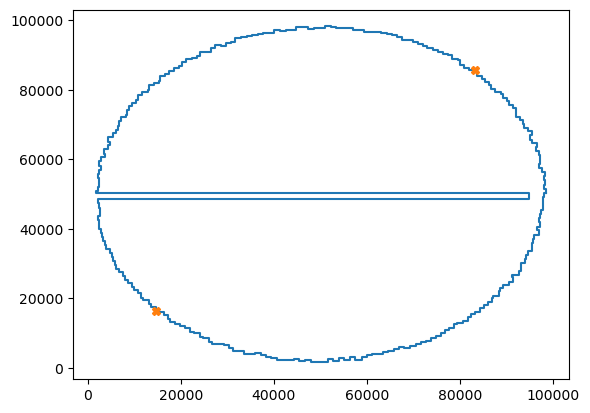

Answer to day 9 part 2: 0


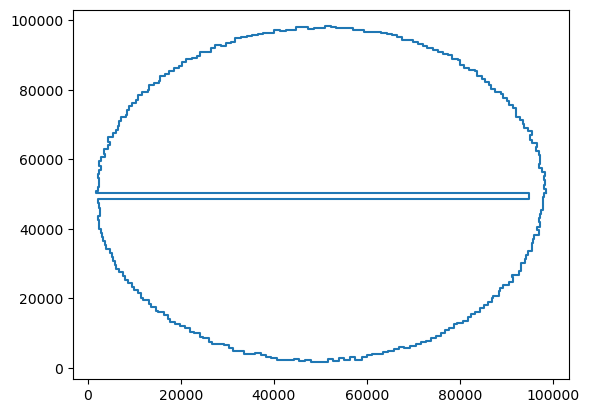

In [18]:
import matplotlib.pyplot as plt

red_tiles = []
with open("data/input_day9") as f:
    for line in f.readlines():
        line = line.strip()
        red_tiles.append([int(coor) for coor in line.split(",")])

red_tiles.append(red_tiles[0])
red_tiles_array = np.array(red_tiles)

# This creates the combinations array without passing by the combinations itertools
i, j = np.triu_indices(len(red_tiles_array), k=1)
corner_combinations = np.column_stack((red_tiles_array[i], red_tiles_array[j]))

size_max_1 = [0, None, None]
size_max_2 = [0, None, None]
for corners in corner_combinations:
    c1 = corners[:2]
    c2 = corners[2:]
    new_size = abs(c1[0] - c2[0] + 1) * abs(c1[1] - c2[1] + 1)

    if size_max_1[0] > new_size:
        continue
    # if corners are aligned, they can't make a rectangle, pass
    if c1[0] == c2[0] or c1[1] == c2[1]:
        continue
    
    size_max_1 = [new_size, c1, c2]

    # # If the new calculated size is smaller than the current size, pass
    # if new_size < size_max_2:
    #     continue
    # # For each segment in the red_tiles_array (adjacent points), check if they interesct with the rectangle diagonal
    # inter = False
    # for segment in range(len(red_tiles_array)-1):
    #     s1, s2 = red_tiles_array[segment], red_tiles_array[segment+1]

    #     # If corner is part of the segment, pass
    #     if all(c1 == s1) or all(c1 == s2) or all(c2 == s1) or all(c2 == s2):
    #         continue
    #     # If segment is completely outside of the square made by the corners, pass
    #     elif (s1[0] == s2[0] and (s1[0] < min(c1[0], c2[0]) or s1[0] > max(c1[0], c2[0])) and (min(s1[1], s2[1]) < min(c1[1], c2[1]) and max(s1[1], s2[1]) > max(c1[1], c2[1]))) or (s1[1] == s2[1] and (s1[1] < min(c1[1], c2[1]) or s1[1] > max(c1[1], c2[1])) and (min(s1[0], s2[0]) < min(c1[0], c2[0]) and max(s1[0], s2[0]) > max(c1[0], c2[0]))):
    #         continue
        
    #     # check if the segment intercepts with the corner
    #     t = ((c1[0]-s1[0]) * (s1[1]-s2[1]) - (c1[1] - s1[1]) * (s1[0] - s2[0])) / ((c1[0]-c2[0]) * (s1[1]-s2[1]) - (c1[1] - c2[1]) * (s1[0] - s2[0]))
    #     u = -  ((c1[0]-c2[0]) * (c1[1]-s1[1]) - (c1[1] - c2[1]) * (c1[0] - s1[0])) / ((c1[0]-c2[0]) * (s1[1]-s2[1]) - (c1[1] - c2[1]) * (s1[0] - s2[0]))

    #     if 0 <= t <= 1 and 0 <= u <= 1:
    #         inter = True
    #         break

    # if not inter: 
        # size_max_2 = new_size

plt.plot(red_tiles_array[:,0], red_tiles_array[:,1])
plt.plot(np.array(size_max_1[1:])[:,0], np.array(size_max_1[1:])[:,1], marker="X", linestyle='None')
print(f"Answer to day 9 part 1: {size_max_1[0]}") 
plt.show()

plt.plot(red_tiles_array[:,0], red_tiles_array[:,1])
# plt.plot(np.array(size_max_2[1:])[:,0], np.array(size_max_2[1:])[:,1], marker="X", linestyle='None')
print(f"Answer to day 9 part 2: {size_max_2[0]}") 

In [19]:
# Part2 -> too high: 3044600550

## Day 10

In [20]:
from collections import deque

In [186]:
# To speed up if necessary: bitwise operation: int('00000010', 2) ^ 0b00000001
# Changing to bitwise operation sped up from 4 min to 1 min and pruning branches sped up to < 0.3s the input run
manual = []
manual_j = []
with open("data/example_day10") as f:
    for line in f.readlines():
        lights, *buttons, joltage = line.strip().split()

        # replace the lights signs by 1/0 depending if the position is off or on and change to binary -> int
        lights = np.array(["1" if l=="#" else "0" for l in lights[1:-1]])
        lights_int = int(''.join(lights), 2)
        # replace the position of activated butons with a list of 1/0 if button activates or not the position and change to binary -> int
        buttons = [[int(i) for i in b[1:-1].split(',')] for b in buttons]
        buttons = np.array([["1" if idx in b else "0" for idx in range(len(lights))] for b in buttons])
        buttons_int = [int(''.join(b), 2) for b in buttons]
        # replace string by int for joltage values
        joltage = [int(j) for j in joltage[1:-1].split(',')]
        # add all the information to the manual
        manual.append((lights_int, len(lights),buttons_int))
        manual_j.append((np.array([[int(i) for i in b] for b in buttons]),np.array([int(j) for j in joltage])))

In [167]:
total = []

for idx in range(len(manual)):
    lights, ll, buttons = manual[idx]
    state_0 = 0
    q = deque([[state_0, b, 1] for b in buttons])
    states_done = [state_0]
    
    while q:
        current_state, next_button, queue = q.popleft()
        next_state = current_state ^ next_button

        if next_state == lights:
            total.append(queue)
            break
        
        else:
            if not next_state in states_done:
                states_done.append(next_state)
                q.extend([[next_state, b, queue + 1] for b in buttons])

print(f"Answer to day 10 part 1: {sum(total)}") # 432

Answer to day 10 part 1: 432


In [ ]:
# System of equations with more variables than equations
# Use np.lnalg.lstsqt to solve approximately and round to int : np.linalg.lstsq(A, w_0)[0].round()
# Where A is the buttons matrix transposed and w_0 is the joltage objective
# CHange the negative values into 0
# Then, explore with pushing button +/- 1 times each iteration -> only do negatives if current button value is above 0
# Decide on +/- by looking at the difference between the objective and the current state only at the button positions 
total = []

for idx in range(len(manual_j)):
    buttons, joltage = manual_j[idx]
    
    A = buttons.T
    approx_total = np.linalg.lstsq(A, joltage)[0].round()
    states_done = [approx_total]
    q = deque([[approx_total] for b in buttons])

    while q:
        
        current_state, next_button, queue = q.popleft()

        break

        # # algo to find the best increment of button pushing
        # pushes = sum(next_button * (joltage - current_state)) // sum(next_button) // 2
        # print(pushes)
        # if pushes == 0: pushes = 1
        # next_state = current_state + pushes * next_button

        # if np.array_equal(next_state, joltage):
        #     total.append(queue)
        #     break
        
        # else:
        #     if not np.any(np.all(next_state == states_done, axis=1)): #and not any((joltage - next_state) < 0):
        #         states_done.append(next_state)
        #         print(next_state)
        #         q.extend([[next_state, b, queue + pushes] for b in buttons])

print(f"Answer to day 10 part 2: {sum(total)}") # 432

[2. 3. 1. 2. 1. 2.]
[ 3.  4. -1.  5.  0.]
[4. 1. 5. 2.]
Answer to day 10 part 2: 0


In [190]:
manual_j[0][0]

array([[0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 1, 0, 0]])

In [192]:
manual_j[0][1]

array([3, 5, 4, 7])

In [221]:
A = np.array([
    [0, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 0]
])
w_0 = np.array([3, 5, 4, 7])
w = np.array([1, 3, 0, 3, 1, 2])
np.linalg.lstsq(A.T, w_0)[0].round()

array([2., 3., 1., 2., 1., 2.])

## Day 11

## Day 12